<h1><center>Лабораторная работа №5 "Линейная регрессия".</center></h1>
<h2><center>Вахлаева Марина Олеговна, гр. 6131-010402D</center></h2>

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

### 1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

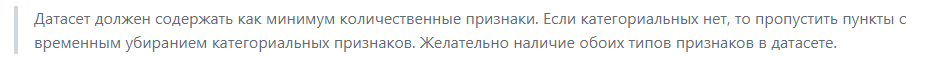

In [2]:
#path = 'C:/Users/PC/Downloads/Python/TAI/datasets/'

# df = pd.read_csv(Path(path, 'diabetes_prediction_dataset.csv'))
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### 2. Датасет и подготовка данных, этап 1:

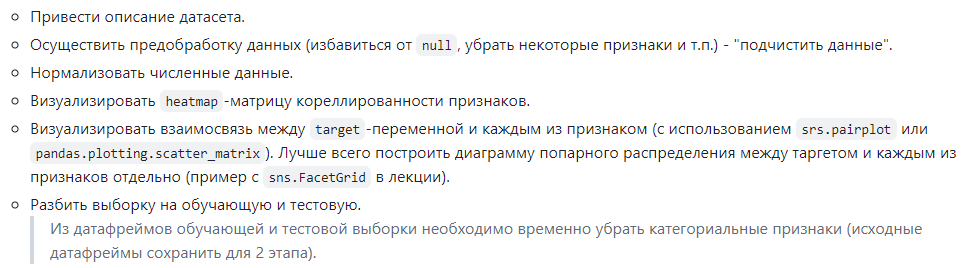

#### Описание датасета

Набор данных для прогнозирования диабета. 

Датасет представляет собой совокупность медицинских и демографических данных пациентов, а также их статуса диабета (положительного или отрицательного). Этот набор данных можно использовать для создания моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут подвергаться риску развития диабета, и при разработке индивидуальных планов лечения. Кроме того, набор данных может быть использован исследователями для изучения взаимосвязи между различными медицинскими и демографическими факторами и вероятностью развития диабета.

Ссылка на датасет: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data
        
|       Признак       |       Расшифровка      |
|---------------------|------------------------|
| gender              |Пол                     |
| age                 |Возраст                 | 
| hypertension        |Гипертония              | 
| heart_disease       |Болезни сердца          | 
| smoking_history     |История курения         |
| bmi                 |Индекс массы тела       |
| HbA1c_level         |Уровень HbA1c           | 
| blood_glucose_level |Уровень глюкозы в крови |
| diabetes            |Диабет                  | 

#### Предобработка данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


NaN значения отсутсвуют в данных. Можно сказать, что к категориальным признакам относятся "gender" и "smoking_history"

За таргет принимает признак "age"

#### Нормализация численных данных

In [7]:
#Закодируем категориальные признаки 
df['gender'] = df["gender"].replace({'Female': 0, 'Male': 1, 'Other': 2})
df['smoking_history'] = df["smoking_history"].replace({'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5})

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,1,27.32,6.2,90,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [9]:
all_cols = list(df.columns)
mm_scaler = MinMaxScaler()
features_scaled = mm_scaler.fit_transform(df[all_cols])
df_sc = pd.DataFrame(features_scaled, columns=all_cols)
df_sc

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.0,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.2,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.4,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.4,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99995,0.0,1.000000,0.0,0.0,0.2,0.202031,0.490909,0.045455,0.0
99996,0.0,0.024024,0.0,0.0,0.2,0.085901,0.545455,0.090909,0.0
99997,0.5,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,0.0,0.299299,0.0,0.0,0.0,0.296569,0.090909,0.090909,0.0


In [10]:
df_ = df_sc.drop(['gender', 'smoking_history'], axis = 1)
df_

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0
1,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0
2,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0
4,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...
99995,1.000000,0.0,0.0,0.202031,0.490909,0.045455,0.0
99996,0.024024,0.0,0.0,0.085901,0.545455,0.090909,0.0
99997,0.824825,0.0,0.0,0.207983,0.400000,0.340909,0.0
99998,0.299299,0.0,0.0,0.296569,0.090909,0.090909,0.0


#### Визуализировать `heatmap`-матрицу кореллированности признаков

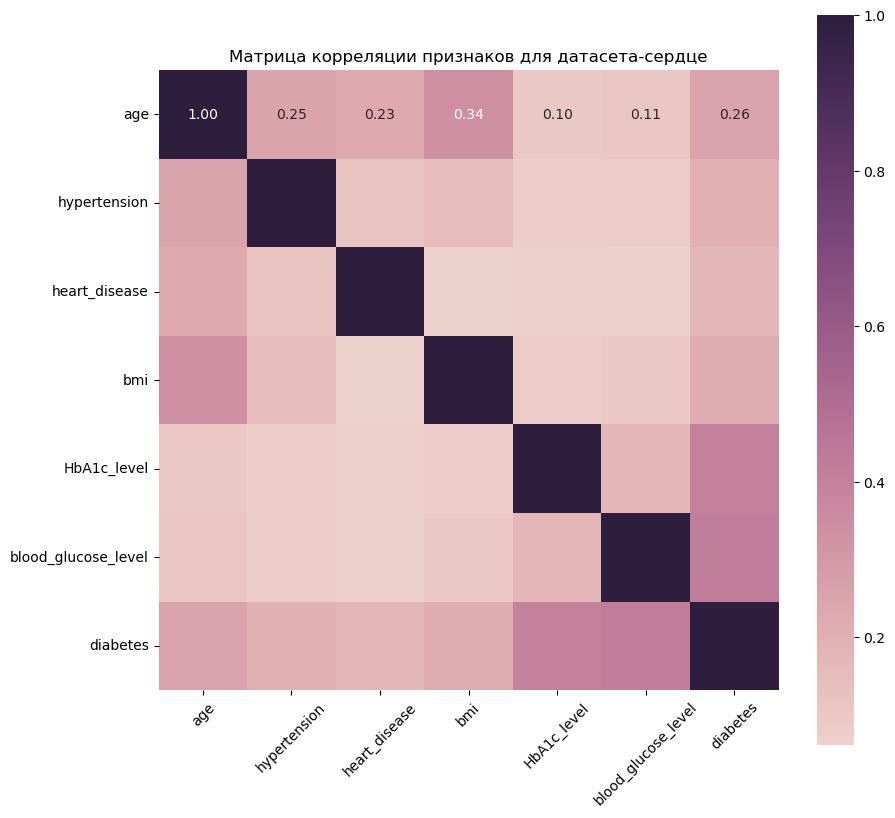

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Матрица корреляции признаков для датасета-сердце')
cmap = sns.diverging_palette(240, 0, s=70, l=80, as_cmap=True)
ax_sns = sns.heatmap(ax = ax, data=df_.corr(), cmap=sns.cubehelix_palette(as_cmap=True), square=True, annot=True, fmt='.2f', linecolor='white')
ax_sns.set_xticklabels(ax_sns.get_xticklabels(), rotation=45)
ax_sns.set_yticklabels(ax_sns.get_yticklabels(), rotation=0)
plt.subplots_adjust(bottom=0.15)
plt.show()

Видно, что признаки совсем не коррелируют друг с другом. Наибольшая из представленных корреляций у "bmi" и "age", а также у "diabetes" с "HbA1c_level" и "blood_glucose_level"  

#### Выполним визуализацию взаимосвязи между target-переменной и каждым из признаков с помощью sns.pairplot

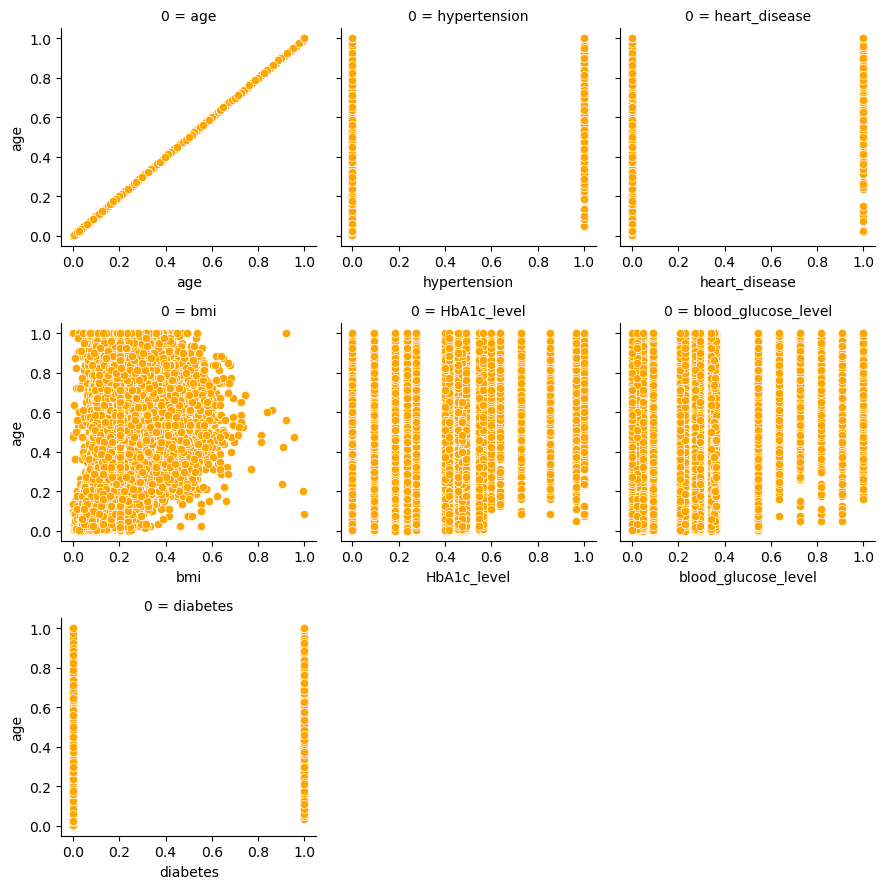

In [12]:
fig = sns.FacetGrid(pd.DataFrame(df_.columns), col=0, col_wrap=3, sharex=False)

for ax, varx in zip(fig.axes, df_.columns):
    sns.scatterplot(data=df_sc[df_.columns], x=varx, y='age', ax=ax, color = 'orange')
    
fig.tight_layout()

Четкой линейной зависимости все равно не наблюдается :( 

#### Разбиение на обучающую и тестовую выборки

In [13]:
df__ = df_.drop('age', axis = 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df__, df_sc['age'], test_size= 0.3, random_state= 42)

### 3. Регрессия МНК:

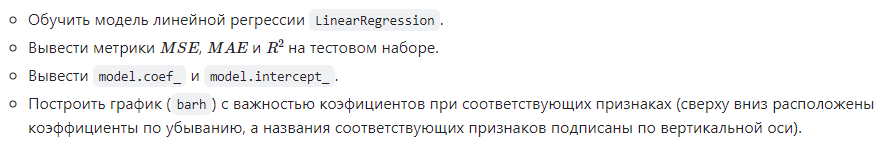

#### Обучение модели линейной регрессии

In [15]:
model_regr = LinearRegression()
model_regr.fit(X_train, y_train)
model_regr_pred = model_regr.predict(X_test)

#### Вывод метрик 

In [16]:
mse = mean_squared_error(y_test, model_regr_pred)
mae = mean_absolute_error(y_test, model_regr_pred)
r_2 = r2_score(y_test, model_regr_pred)

print('Средняя квадратичная ошибка (MSE): ', mse)
print('Средняя абсолютная ошибка (MAE): ', mae)
print('Коэффициент детерминации (R2 score): ', r_2)

Средняя квадратичная ошибка (MSE):  0.06321904842456348
Средняя абсолютная ошибка (MAE):  0.21040467237990226
Коэффициент детерминации (R2 score):  0.20692270868626972


Коэффициент детерминации близок к 0 - 0.2, что говорит о том, что между переменными регрессионной модели практически отсутствуют линейные зависимости.

In [17]:
model_regr.coef_

array([ 1.71420562e-01,  2.48550121e-01,  1.00358204e+00, -6.26225452e-03,
        7.55128930e-04,  1.41838583e-01])

In [18]:
df_features = pd.DataFrame(columns=df__.columns, data=np.reshape(model_regr.coef_, (1, -1)))
df_features

,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.171421,0.24855,1.003582,-0.006262,0.000755,0.141839


Высокий коэффициент у признака "bmi", далее по градации идет "heart_disease" и "hypertension"

In [19]:
model_regr.intercept_

0.2879670962346119

([<matplotlib.axis.YTick at 0x1c3c6d2ea50>,
 [Text(0, 0, 'HbA1c_level'),
  Text(0, 1, 'blood_glucose_level'),
  Text(0, 2, 'diabetes'),
  Text(0, 3, 'hypertension'),
  Text(0, 4, 'heart_disease'),
  Text(0, 5, 'bmi')])

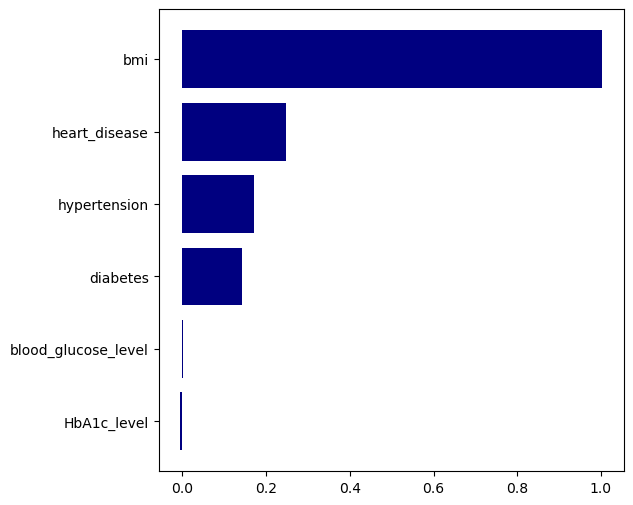

In [20]:
coef = []
name = []
z = zip(model_regr.coef_, df__.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef.append(c)
    name.append(n)
    
plt.figure(figsize=(6,6))
plt.barh(range(len(model_regr.coef_)), coef, align='center', color = 'navy')
plt.yticks(range(len(model_regr.coef_)), name)    

### 4. Для каждого вида регрессии (Ridge, LASSO, Elastic Net):

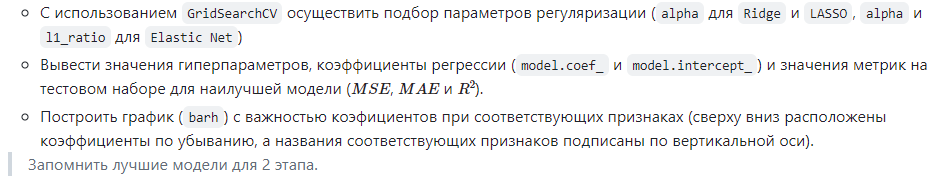

#### LASSO

In [21]:
lasso_reg = Lasso()

param = {"alpha": np.arange(0.2, 5, 0.1)}
lasso_grid_search = GridSearchCV(lasso_reg, param, refit= True, n_jobs= -1, verbose = 2)
lasso_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])},
             verbose=2)

In [22]:
print(f"Best params for Lasso: {lasso_grid_search.best_params_}")

Best params for Lasso: {'alpha': 0.2}


In [23]:
model_lasso = Lasso(alpha= 0.2)
model_lasso.fit(X_train, y_train)
model_lasso_pred = model_lasso.predict(X_test) 

mse_lasso = mean_squared_error(y_test, model_lasso_pred)
mae_lasso = mean_absolute_error(y_test, model_lasso_pred)
r_2_lasso = r2_score(y_test, model_lasso_pred)

print('Средняя квадратичная ошибка Lasso (MSE): ', mse_lasso)
print('Средняя абсолютная ошибка Lasso (MAE): ', mae_lasso)
print('Коэффициент детерминации Lasso (R2 score): ', r_2_lasso)

Средняя квадратичная ошибка Lasso (MSE):  0.07971685018737872
Средняя абсолютная ошибка Lasso (MAE):  0.23894359738071402
Коэффициент детерминации Lasso (R2 score):  -4.073446483987553e-05


In [24]:
df_features_lasso = pd.DataFrame(columns=df__.columns, data=np.reshape(model_lasso.coef_, (1, -1)))
df_features_lasso

,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
model_lasso.intercept_

0.5236368868868869

([<matplotlib.axis.YTick at 0x1c3c6d83f90>,
 [Text(0, 0, 'hypertension'),
  Text(0, 1, 'heart_disease'),
  Text(0, 2, 'bmi'),
  Text(0, 3, 'HbA1c_level'),
  Text(0, 4, 'blood_glucose_level'),
  Text(0, 5, 'diabetes')])

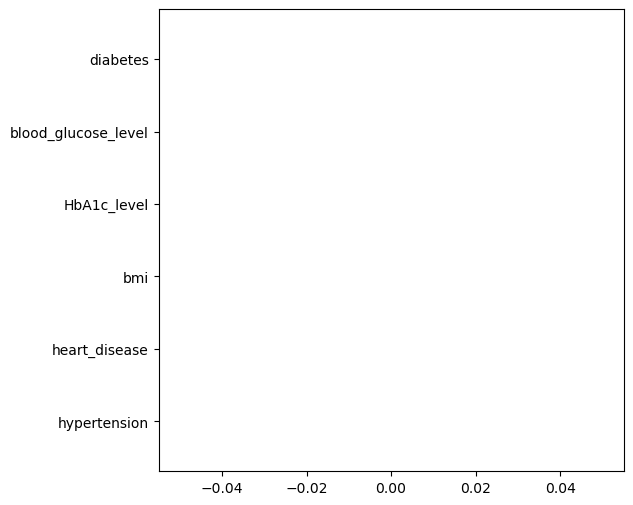

In [26]:
coef_lasso = []
name_lasso = []
z = zip(model_lasso.coef_, df__.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_lasso.append(c)
    name_lasso.append(n)
    
plt.figure(figsize=(6,6))
plt.barh(range(len(model_lasso.coef_)), coef_lasso, align='center', color = 'salmon')
plt.yticks(range(len(model_lasso.coef_)), name_lasso) 

#### Ridge

In [27]:
ridge_reg = Ridge()

param = {"alpha": np.arange(0.2, 8, 0.1)}
ridge_grid_search = GridSearchCV(ridge_reg, param, refit= True, n_jobs= -1, verbose = 2)
ridge_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3,
       5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6,
       6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9])},
             verbose=2)

In [28]:
print(f"Best params for Ridge: {ridge_grid_search.best_params_}")

Best params for Ridge: {'alpha': 0.2}


In [29]:
model_ridge = Ridge(alpha= 1.6)
model_ridge.fit(X_train, y_train)
model_ridge_pred = model_ridge.predict(X_test) 

mse_ridge = mean_squared_error(y_test, model_ridge_pred)
mae_ridge = mean_absolute_error(y_test, model_ridge_pred)
r_2_ridge = r2_score(y_test, model_ridge_pred)

print('Средняя квадратичная ошибка Ridge (MSE): ', mse_ridge)
print('Средняя абсолютная ошибка Ridge (MAE): ', mae_ridge)
print('Коэффициент детерминации Ridge (R2 score): ', r_2_ridge)

Средняя квадратичная ошибка Ridge (MSE):  0.06321775110770372
Средняя абсолютная ошибка Ridge (MAE):  0.2104112828508841
Коэффициент детерминации Ridge (R2 score):  0.20693898340989747


In [30]:
df_features_ridge = pd.DataFrame(columns=df__.columns, data=np.reshape(model_ridge.coef_, (1, -1)))
df_features_ridge

,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.17151,0.248441,0.999561,-0.006235,0.000788,0.142011


Результат получился схож с линейной регрессией

In [31]:
model_ridge.intercept_

0.2887436530140125

([<matplotlib.axis.YTick at 0x1c3c6d9f150>,
 [Text(0, 0, 'HbA1c_level'),
  Text(0, 1, 'blood_glucose_level'),
  Text(0, 2, 'diabetes'),
  Text(0, 3, 'hypertension'),
  Text(0, 4, 'heart_disease'),
  Text(0, 5, 'bmi')])

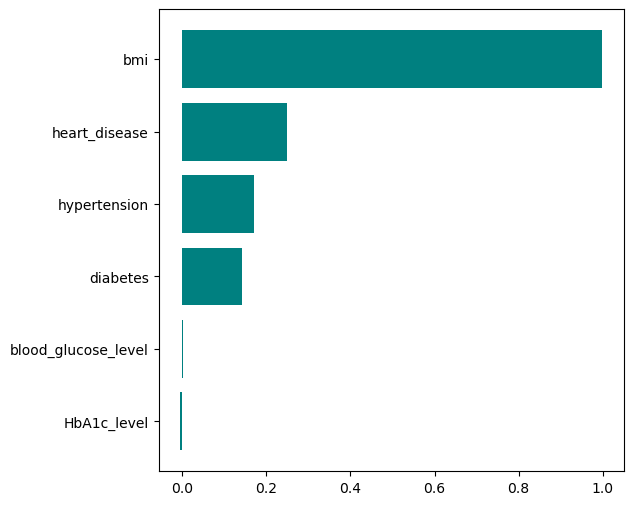

In [32]:
coef_ridge = []
name_ridge = []
z = zip(model_ridge.coef_, df__.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_ridge.append(c)
    name_ridge.append(n)
    
plt.figure(figsize=(6,6))
plt.barh(range(len(model_ridge.coef_)), coef_ridge, align='center', color = 'teal')
plt.yticks(range(len(model_ridge.coef_)), name_ridge) 

#### Elastic Net

In [33]:
elastic_net_reg = ElasticNet()

param = {"alpha": np.arange(0.2, 8, 0.1),
         "l1_ratio": [0.05, 0.2, 0.75]}

elastic_net_grid_search = GridSearchCV(elastic_net_reg, param, refit= True, n_jobs= -1, verbose = 2)
elastic_net_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3,
       5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6,
       6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
                         'l1_ratio': [0.05, 0.2, 0.75]},
             verbose=2)

In [34]:
print(f"Best params for Elastic Net: {elastic_net_grid_search.best_params_}")

Best params for Elastic Net: {'alpha': 0.2, 'l1_ratio': 0.05}


In [35]:
model_Elastic_Net = ElasticNet(alpha= 0.2, l1_ratio = 0.05)
model_Elastic_Net.fit(X_train, y_train)
model_Elastic_Net_pred = model_Elastic_Net.predict(X_test) 

mse_Elastic_Net = mean_squared_error(y_test, model_Elastic_Net_pred)
mae_Elastic_Net = mean_absolute_error(y_test, model_Elastic_Net_pred)
r_2_Elastic_Net = r2_score(y_test, model_Elastic_Net_pred)

print('Средняя квадратичная ошибка Elastic Net (MSE): ', mse_Elastic_Net)
print('Средняя абсолютная ошибка Elastic Net (MAE): ', mae_Elastic_Net)
print('Коэффициент детерминации Elastic Net (R2 score): ', r_2_Elastic_Net)

Средняя квадратичная ошибка Elastic Net (MSE):  0.07705098206949554
Средняя абсолютная ошибка Elastic Net (MAE):  0.23457835278962066
Коэффициент детерминации Elastic Net (R2 score):  0.033402341927764256


In [36]:
df_features_Elastic_Net = pd.DataFrame(columns=df__.columns, data=np.reshape(model_Elastic_Net.coef_, (1, -1)))
df_features_Elastic_Net

,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.031053,0.010202,0.0,0.0,0.0,0.036322


In [37]:
model_Elastic_Net.intercept_

0.5177845548836977

([<matplotlib.axis.YTick at 0x1c3c6505b50>,
 [Text(0, 0, 'heart_disease'),
  Text(0, 1, 'bmi'),
  Text(0, 2, 'HbA1c_level'),
  Text(0, 3, 'hypertension'),
  Text(0, 4, 'age'),
  Text(0, 5, 'blood_glucose_level')])

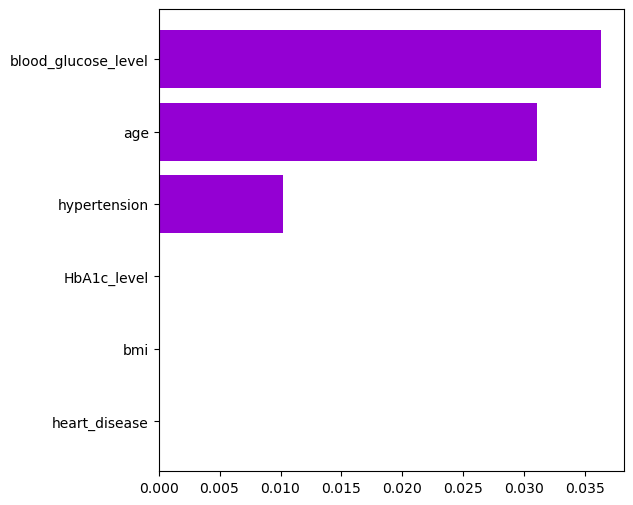

In [38]:
coef_Elastic = []
name_Elastic = []
z = zip(model_Elastic_Net.coef_, df_.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_Elastic.append(c)
    name_Elastic.append(n)
    
plt.figure(figsize=(6,6))
plt.barh(range(len(model_Elastic_Net.coef_)), coef_Elastic, align='center', color = 'darkviolet')
plt.yticks(range(len(model_Elastic_Net.coef_)), name_Elastic)

### 5. Датасет и подготовка данных, этап 2:

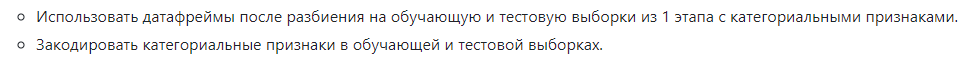

In [40]:
df_sc

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.0,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.2,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.4,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.4,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99995,0.0,1.000000,0.0,0.0,0.2,0.202031,0.490909,0.045455,0.0
99996,0.0,0.024024,0.0,0.0,0.2,0.085901,0.545455,0.090909,0.0
99997,0.5,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,0.0,0.299299,0.0,0.0,0.0,0.296569,0.090909,0.090909,0.0


In [41]:
df_sc_ = df_sc.drop(['age'], axis = 1)

In [42]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(df_sc_, df_sc['age'], test_size= 0.3, random_state= 42)

### 6. Регрессии, этап 2: 

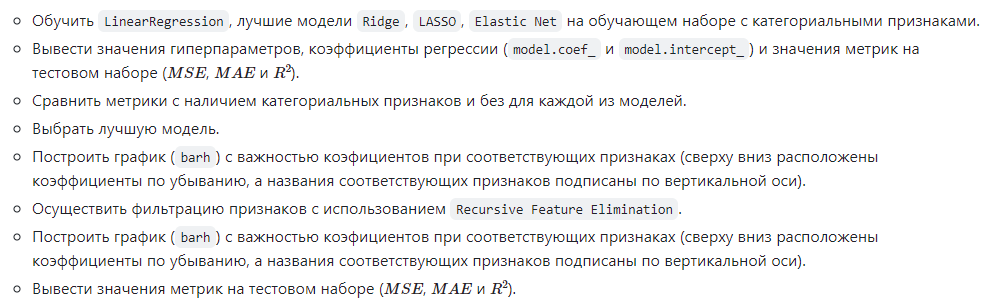

In [43]:
def print_metrics(model, x_test, y_test): 
    model_pred = model.predict(x_test)
    return print(f"MSE: {mean_squared_error(y_test, model_pred)} \nMAE: {mean_absolute_error(y_test, model_pred)} \nR2 score: {r2_score(y_test, model_pred)}")

In [44]:
model_regr_ = LinearRegression()
model_regr_.fit(X_train_, y_train_)
model_regr_pred_ = model_regr_.predict(X_test_)

model_lasso_ = Lasso(alpha= 0.2)
model_lasso_.fit(X_train_, y_train_)
model_lasso_pred_ = model_lasso_.predict(X_test_) 

model_ridge_ = Ridge(alpha= 1.6)
model_ridge_.fit(X_train_, y_train_)
model_ridge_pred_ = model_ridge_.predict(X_test_) 

model_Elastic_Net_ = ElasticNet(alpha= 0.2, l1_ratio = 0.05)
model_Elastic_Net_.fit(X_train_, y_train_)
model_Elastic_Net_pred_ = model_Elastic_Net_.predict(X_test_)

In [45]:
print('**Для модели регрессии МНК:** ')
print(print_metrics(model_regr_, X_test_, y_test_))
print('**Для модели lasso:** ')
print(print_metrics(model_lasso_, X_test_, y_test_))
print('**Для модели ridge:** ')
print(print_metrics(model_ridge_, X_test_, y_test_))
print('**Для модели Elastic Net:** ')
print(print_metrics(model_Elastic_Net_, X_test_, y_test_))

**Для модели регрессии МНК:** 
MSE: 0.06224922308886772 
MAE: 0.20889940522339878 
R2 score: 0.21908908052273945
None
**Для модели lasso:** 
MSE: 0.07971685018737872 
MAE: 0.23894359738071402 
R2 score: -4.073446483987553e-05
None
**Для модели ridge:** 
MSE: 0.0622479825104647 
MAE: 0.20890721732890036 
R2 score: 0.21910464346751712
None
**Для модели Elastic Net:** 
MSE: 0.07693254957043688 
MAE: 0.2343969677979342 
R2 score: 0.034888067004266055
None


In [46]:
#Результаты на датасете без категориальных признаков
print('**Для модели регрессии МНК:** ')
print(print_metrics(model_regr, X_test, y_test))
print('**Для модели lasso:** ')
print(print_metrics(model_lasso, X_test, y_test))
print('**Для модели ridge:** ')
print(print_metrics(model_ridge, X_test, y_test))
print('**Для модели Elastic Net:** ')
print(print_metrics(model_Elastic_Net, X_test, y_test))

**Для модели регрессии МНК:** 
MSE: 0.06321904842456348 
MAE: 0.21040467237990226 
R2 score: 0.20692270868626972
None
**Для модели lasso:** 
MSE: 0.07971685018737872 
MAE: 0.23894359738071402 
R2 score: -4.073446483987553e-05
None
**Для модели ridge:** 
MSE: 0.06321775110770372 
MAE: 0.2104112828508841 
R2 score: 0.20693898340989747
None
**Для модели Elastic Net:** 
MSE: 0.07705098206949554 
MAE: 0.23457835278962066 
R2 score: 0.033402341927764256
None


При наличии закодированных категориальных признаков результат стал чуть-чуть лучше для моделей линейной регрессии и ridge.

Все модели показали ужасный результат. Выберем "наименьшее из зол". В качестве лучшей модели будем считать модель линейной регрессии для данных вместе с категориальными признаками.

([<matplotlib.axis.YTick at 0x1c3cb116210>,
 [Text(0, 0, 'gender'),
  Text(0, 1, 'HbA1c_level'),
  Text(0, 2, 'blood_glucose_level'),
  Text(0, 3, 'smoking_history'),
  Text(0, 4, 'diabetes'),
  Text(0, 5, 'hypertension'),
  Text(0, 6, 'heart_disease'),
  Text(0, 7, 'bmi')])

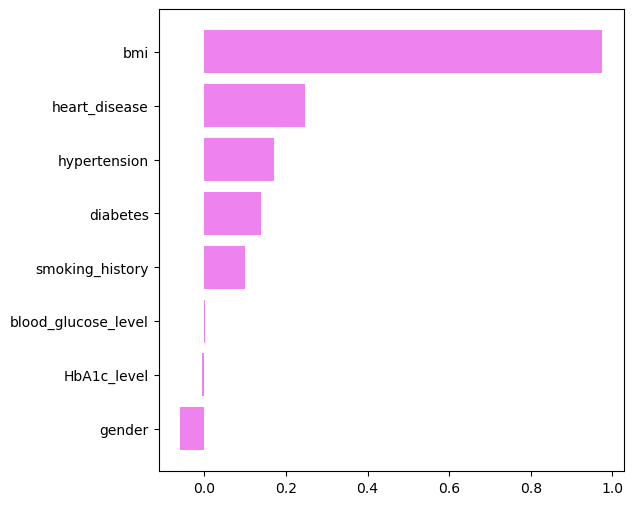

In [49]:
coef_regr_ = []
name_regr_ = []
z = zip(model_regr_.coef_, df_sc_.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_regr_.append(c)
    name_regr_.append(n)
    
plt.figure(figsize=(6,6))
plt.barh(range(len(model_regr_.coef_)), coef_regr_, align='center', color = 'violet')
plt.yticks(range(len(model_regr_.coef_)), name_regr_)

In [50]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=LinearRegression(), n_features_to_select=4)
model = LinearRegression()

rf_pipeline = Pipeline(steps=[('rfe', rfe), ('model', model)])
rf_pipeline.fit(X_train_, y_train_)

print(f"Выбранные признаки:\n{rf_pipeline.named_steps['rfe'].get_feature_names_out()}")
print(f"Коэффициенты регрессии:\n{model.coef_}")
print("Метрики модели: ")
print(print_metrics(rf_pipeline, X_test_, y_test_))

Выбранные признаки:
['hypertension' 'heart_disease' 'bmi' 'diabetes']
Коэффициенты регрессии:
[0.1713969  0.24854862 1.00363722 0.14028908]
Метрики модели: 
MSE: 0.06321544188299635 
MAE: 0.21039974545110926 
R2 score: 0.2069679524266984
None


([<matplotlib.axis.YTick at 0x1c3cb4f6f10>,
 [Text(0, 0, 'smoking_history'),
  Text(0, 1, 'gender'),
  Text(0, 2, 'hypertension'),
  Text(0, 3, 'heart_disease')])

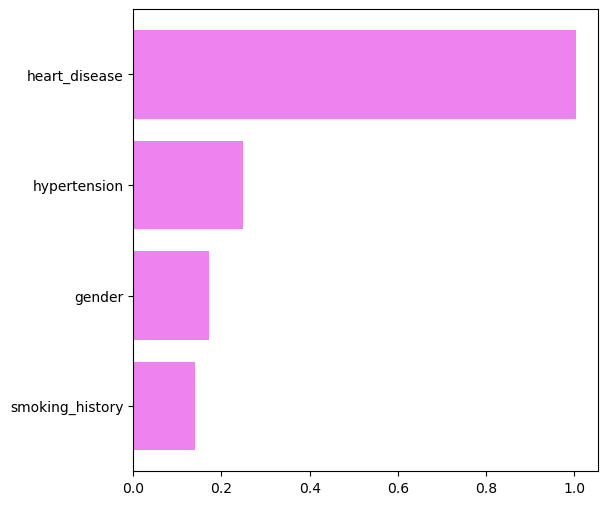

In [51]:
coef_regr_n = []
name_regr_n = []
z = zip(model.coef_, df_sc_.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_regr_n.append(c)
    name_regr_n.append(n)
    
plt.figure(figsize=(6,6))
plt.barh(range(len(model.coef_)), coef_regr_n, align='center', color = 'violet')
plt.yticks(range(len(model.coef_)), name_regr_n)

### 7. Сделать вывод:

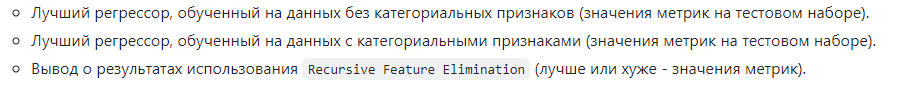

Датасет не предназначен для регрессии (P.S. я пробовала еще два датасета с сердцем и с космическими объектами, там результаты были более разнообразными, но не было категориальных признаков, поэтому решила оставить с диабетом :(, но как оказалось результат тоже не порадовал). RFE дала бы более хороший результат. 

Лучшие регрессоры и для данных с категориальными признаками, и для данных без категориальных признаков - линейная регрессия и ridge (их коэффициенты детерминации равны, на данных без категориальных признаков 0.20, а на данных с закодированными категориальными признаками - 0.21). После отбора признаков с помощью RFE результат регрессии стал чуть меньше, что и ожидалось (поскольку были удалены признаки, несущие информацию о пресказании классов), возможно если бы в датасете было бы большое число признаков, которые являлись практически шумовой компонентой для предсказания класса, фильтрация признаков с помощью RFE дала бы более хороший результат. 